**Unsupervised Learning**

[ISLR Chapter 10](https://link.springer.com/chapter/10.1007/978-1-4614-7138-7_10)

Unsupervised learning is often much more challenging. The exercise tends to be more subjective, and there is no simple goal for the analysis, such as prediction of a response. Unsupervised learning is often performed as part of an exploratory data analysis.

CSVs can be found here: https://github.com/JWarmenhoven/ISLR-python/tree/master/Notebooks/Data

[Writing math symbols in markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)

[quick reference](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Challenge of Unsupervised Learning

Unsupervised learning is often performed as part of an exploratory data analysis. Furthermore, it can be hard to assess the results obtained from unsupervised learning methods, since there is no universally accepted mechanism for performing cross-validation or validating results on an independent data set.

Examples of unsupervised learning:
- analysis gene expression levels in 100 cancer patients and look for sample subgroups
- online shopping site to identify groups of shoppers based on browsing/purchasing histories

# Principal Components Analysis

Principal components are discussed in [Section 6.3.1](https://link.springer.com/chapter/10.1007%2F978-1-4614-7138-7_6#Sec22) in the context of principal components regression. When faced with a large set of correlated variables, principal components allow us to summarize this set with a smaller number of representative variables that collectively explain most of the variability in the original set. The principal component directions are presented in Chapter 6 as directions in feature space along which the original data are highly variable. These directions also define lines and subspaces that are as close as possible to the data cloud. To perform principal components regression, we simply use principal components as predictors in a regression model in place of the original larger set of variables.

## What are principal components?

Suppose that we wish to visualize n observations with measurements on a set of p features,   $X_1,X_2,…, X_p$, as part of an exploratory data analysis. We could do this by examining two-dimensional scatterplots of the data, each of which contains the n observations’ measurements on two of the features. But the number of scatterplots would get very large...Clearly, a better method is required to visualize the n observations when p is large. In particular, we would like to find a low-dimensional representation of the data that captures as much of the information as possible. For instance, if we can obtain a two-dimensional representation of the data that captures most of the information, then we can plot the observations in this low-dimensional space.

PCA seeks a small number of dimensions that are as interesting as possible, where the concept of interesting is measured by the amount that the observations vary along each dimension. Each of the dimensions found by PCA is a linear combination of the p features. We now explain the manner in which these dimensions, or principal components, are found.

The first principal component of a set of features $X_1,X_2,…, X_p$ is the normalized linear combination of the features

$Z_1 = \Phi_{11}X_1 + \Phi_{21}X_2 + ... + \Phi_{p1}X_p $

that has the largest variance. By *normalized*, we mean that $\sum_{j=1}^{p}\Phi_{j1}^2$ = 1. We refer to the elements $\phi_{11}, ..., \phi_{p1}$ as the *loadings* of the first principal component; together, the loadings make up the principal component loading vector, $\Phi_1 = (\Phi_{11} \Phi_{21} ... \Phi_{p1})^T$. We constrain the loadings so that their sum of squares is equal to one, since otherwise setting these elements to be arbitrarily large in absolute value could result in an arbitrarily large variance.

Given a $n \times p$ data set in matrix **X**, how do we compute the first principal component?


*I will pull example data in here so that I can see the steps and see this more concretely.*

In [13]:
df_usarrests = pd.read_csv('ISLR_data/USArrests.csv', index_col=0)
df_usarrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Since we are only interested in variance, we assume that each of the variables in **X** has been centered to have mean zero (that is, the column means of **X** are zero).

**Using Andrew Ng method**

1. Standardize data
2. Compute the covariance matrix
3. Compute the "eigenvectors" of the covariance matrix. (more advanced algebra than we need to know)

In [39]:
from sklearn.preprocessing import StandardScaler

# Assign and standardize data
X = df_usarrests.copy()
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [36]:
X_std.var(axis=0)

array([1., 1., 1., 1.])

In [30]:
X_std.var(axis=0)

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [42]:
from sklearn.preprocessing import Normalizer

# Assign and normalize data
X = df_usarrests.copy()
scaler_norm = Normalizer()
X_norm = scaler_norm.fit_transform(X)

In [43]:
X_norm.var(axis=0)

array([0.00022103, 0.01012516, 0.02731304, 0.00124492])

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assign and standardize data
X = df_usarrests.copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
df_pc_components = pd.DataFrame(pca.components_.T)
df_pc_components.columns = ['PC1', 'PC2']
df_pc_components.index = df_usarrests.columns

In [24]:
df_pc_components

,PC1,PC2
Murder,0.535899,0.418181
Assault,0.583184,0.187986
UrbanPop,0.278191,-0.872806
Rape,0.543432,-0.167319


How are these values calculated?

# Other resources

In [2]:
# For importing example data
import sqlalchemy
import sqlalchemy_utils
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

In [3]:
# Define a database name
# Set your postgres username
dbname = "baseball"
username = "lacar"  # change this to your username

# Working with PostgreSQL in Python
# Connect to make queries using psycopg2
con = None
con = psycopg2.connect(database=dbname, user=username)

# Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine("postgres://%s@localhost/%s" % (username, dbname))
print(engine.url)

postgres://lacar@localhost/baseball


Let's imagine a simple case such as using housing square footage to predict prices.

Ues Padres database.

In [4]:
# Use Padres data from 2018
sql_query = """
SELECT * FROM batting_stats18_wpid
WHERE "Team"='Padres';
"""
df_padres = pd.read_sql_query(sql_query,con)
df_padres.head()

,index,index_x,Season,Name,Team,Age,G,AB,PA,H,...,first_name,index_y,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,123,1094,2018.0,Austin Hedges,Padres,25.0,91.0,303.0,326.0,70.0,...,austin,784,hedges,austin,595978,hedga001,hedgeau01,12976,2015.0,2019.0
1,164,553,2018.0,Hunter Renfroe,Padres,26.0,117.0,403.0,441.0,100.0,...,hunter,1444,renfroe,hunter,592669,renfh001,renfrhu01,15464,2016.0,2019.0
2,166,692,2018.0,Wil Myers,Padres,27.0,83.0,312.0,343.0,79.0,...,wil,1233,myers,wil,571976,myerw001,myerswi01,10047,2013.0,2019.0
3,409,1507,2018.0,Luis Urias,Padres,21.0,12.0,48.0,53.0,10.0,...,luis,1809,urias,luis,649966,urial001,uriaslu01,16622,2018.0,2019.0
4,192,331,2018.0,Franmil Reyes,Padres,22.0,87.0,261.0,285.0,73.0,...,franmil,1448,reyes,franmil,614177,reyef001,reyesfr01,14566,2018.0,2019.0


In [22]:
[print(i) for i in df_padres.columns]

index
index_x
Season
Name
Team
Age
G
AB
PA
H
1B
2B
3B
HR
R
RBI
BB
IBB
SO
HBP
SF
SH
GDP
SB
CS
AVG
GB
FB
LD
IFFB
Pitches
Balls
Strikes
IFH
BU
BUH
BB_perc
K_perc
BB/K
OBP
SLG
OPS
ISO
BABIP
GB/FB
LD_perc
GB_perc
FB_perc
IFFB_perc
HR/FB
IFH_perc
BUH_perc
wOBA
wRAA
wRC
Bat
Fld
Rep
Pos
RAR
WAR
Dol
Spd
wRC+
WPA
-WPA
+WPA
RE24
REW
pLI
phLI
PH
WPA/LI
Clutch
FB_perc _Pitch
FBv
SL_perc
SLv
CT_perc
CTv
CB_perc
CBv
CH_perc
CHv
SF_perc
SFv
KN_perc
KNv
XX_perc
PO_perc
wFB
wSL
wCT
wCB
wCH
wSF
wKN
wFB/C
wSL/C
wCT/C
wCB/C
wCH/C
wSF/C
wKN/C
O-Swing_perc
Z-Swing_perc
Swing_perc
O-Contact_perc
Z-Contact_perc
Contact_perc
Zone_perc
F-Strike_perc
SwStr_perc
BsR
FA_perc _pfx
FT_perc _pfx
FC_perc _pfx
FS_perc _pfx
FO_perc _pfx
SI_perc _pfx
SL_perc _pfx
CU_perc _pfx
KC_perc _pfx
EP_perc _pfx
CH_perc _pfx
SC_perc _pfx
KN_perc _pfx
UN_perc _pfx
vFA _pfx
vFT _pfx
vFC _pfx
vFS _pfx
vFO _pfx
vSI _pfx
vSL _pfx
vCU _pfx
vKC _pfx
vEP _pfx
vCH _pfx
vSC _pfx
vKN _pfx
FA-X _pfx
FT-X _pfx
FC-X _pfx
FS-X _pfx
FO-X _pfx
SI-X 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

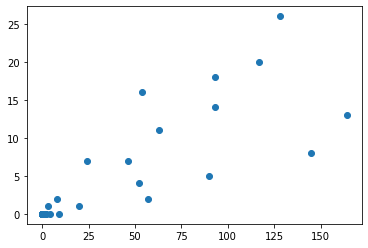

In [24]:
plt.scatter(df_padres['FB'], df_padres['HR'])

## K means vs. heirarchical clustering

See this video
https://www.youtube.com/watch?v=QXOkPvFM6NU&t=933s

See this site
https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/

## PCA

Amazing explanation
<br>
https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
    
<br>
Good video on covariance matrix
<br>

https://www.youtube.com/watch?v=152tSYtiQbw


# [bottom of notebook]